# Breast Cancer Detection

# 1. Introduction

Objective: In this project, we develop a model that predicts breast cancer. The project is based on a dataset containing 30 features and 569 instances of breast cancer diagnoses from the Wisconsin hospital.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe the characteristics of the cell nuclei present in the image.

In [1]:
# Import packages of Data Analysis and Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# 2. Exploratory Data Analysis

In [3]:
# First visualization of the dataset
X.head()

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1     23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2     25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3     26.50       98.87   567.7       0.2098        0.8663      0.6869   
4     16.67      152.20  1575.0       0.1374        0.2050      0.4000   

   concave_points3  symmetry3  fractal_dimension3  
0           0.2654     0.4601             0.11890  
1           0.1860     0.2750             0.08902  
2           0.2430     0.3613             0.08758  
3           0.2575     0.6638             0.17300  
4           0.1625     0.2364             0.07678  

[5 rows x 30 columns]

In [4]:
# Information about the columns and the type of data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recorded with four significant digits.

In [5]:
# First visualization of the target
y.head()

Diagnosis
0         M
1         M
2         M
3         M
4         M

 Diagnosis(M = malignant, B = benign)oximation" - 1)

In [6]:
# Are there missing values?
sum(X.isnull().sum())

0

In [7]:
# Are there missing values?
y.isnull().sum()

Diagnosis    0
dtype: int64

There are no missing attributes

In [8]:
# How balanced are the diagnoses in this dataset?
y.value_counts()

Diagnosis
B            357
M            212
Name: count, dtype: int64

Class distribution: 357 benign, 212 malignant.

We have a balanced data.

In [9]:
# Convert the categorical target to numerical (0 or 1)
y = y.replace({"M":1, "B":0})
y

Diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          0

[569 rows x 1 columns]

In [10]:
# Joining the variables
df=X.join(y)

malignant = df[df['Diagnosis'] == 'M']
benign = df[df['Diagnosis'] == 'B']

In [11]:
# List with the name of the variables
features = X.columns.values

In [12]:
features1 = features[0:9].tolist()
features2 = features[10:19].tolist()
features3 = features[20:29].tolist()

## 2.1 Data Visualization

In [13]:
y

Diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          0

[569 rows x 1 columns]

<Axes: xlabel='Diagnosis', ylabel='count'>

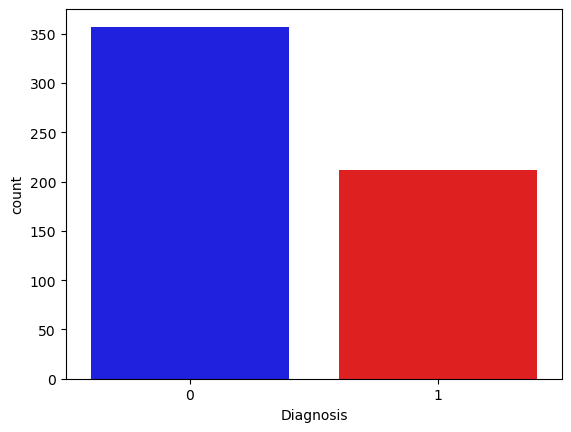

In [14]:
# Create the palette of colors: blue for benign (0), red for malignant (1)
pal = {1:'red', 0:'blue'}

# Visualize how balanced is the data
sns.countplot(x=df['Diagnosis'], palette=pal)

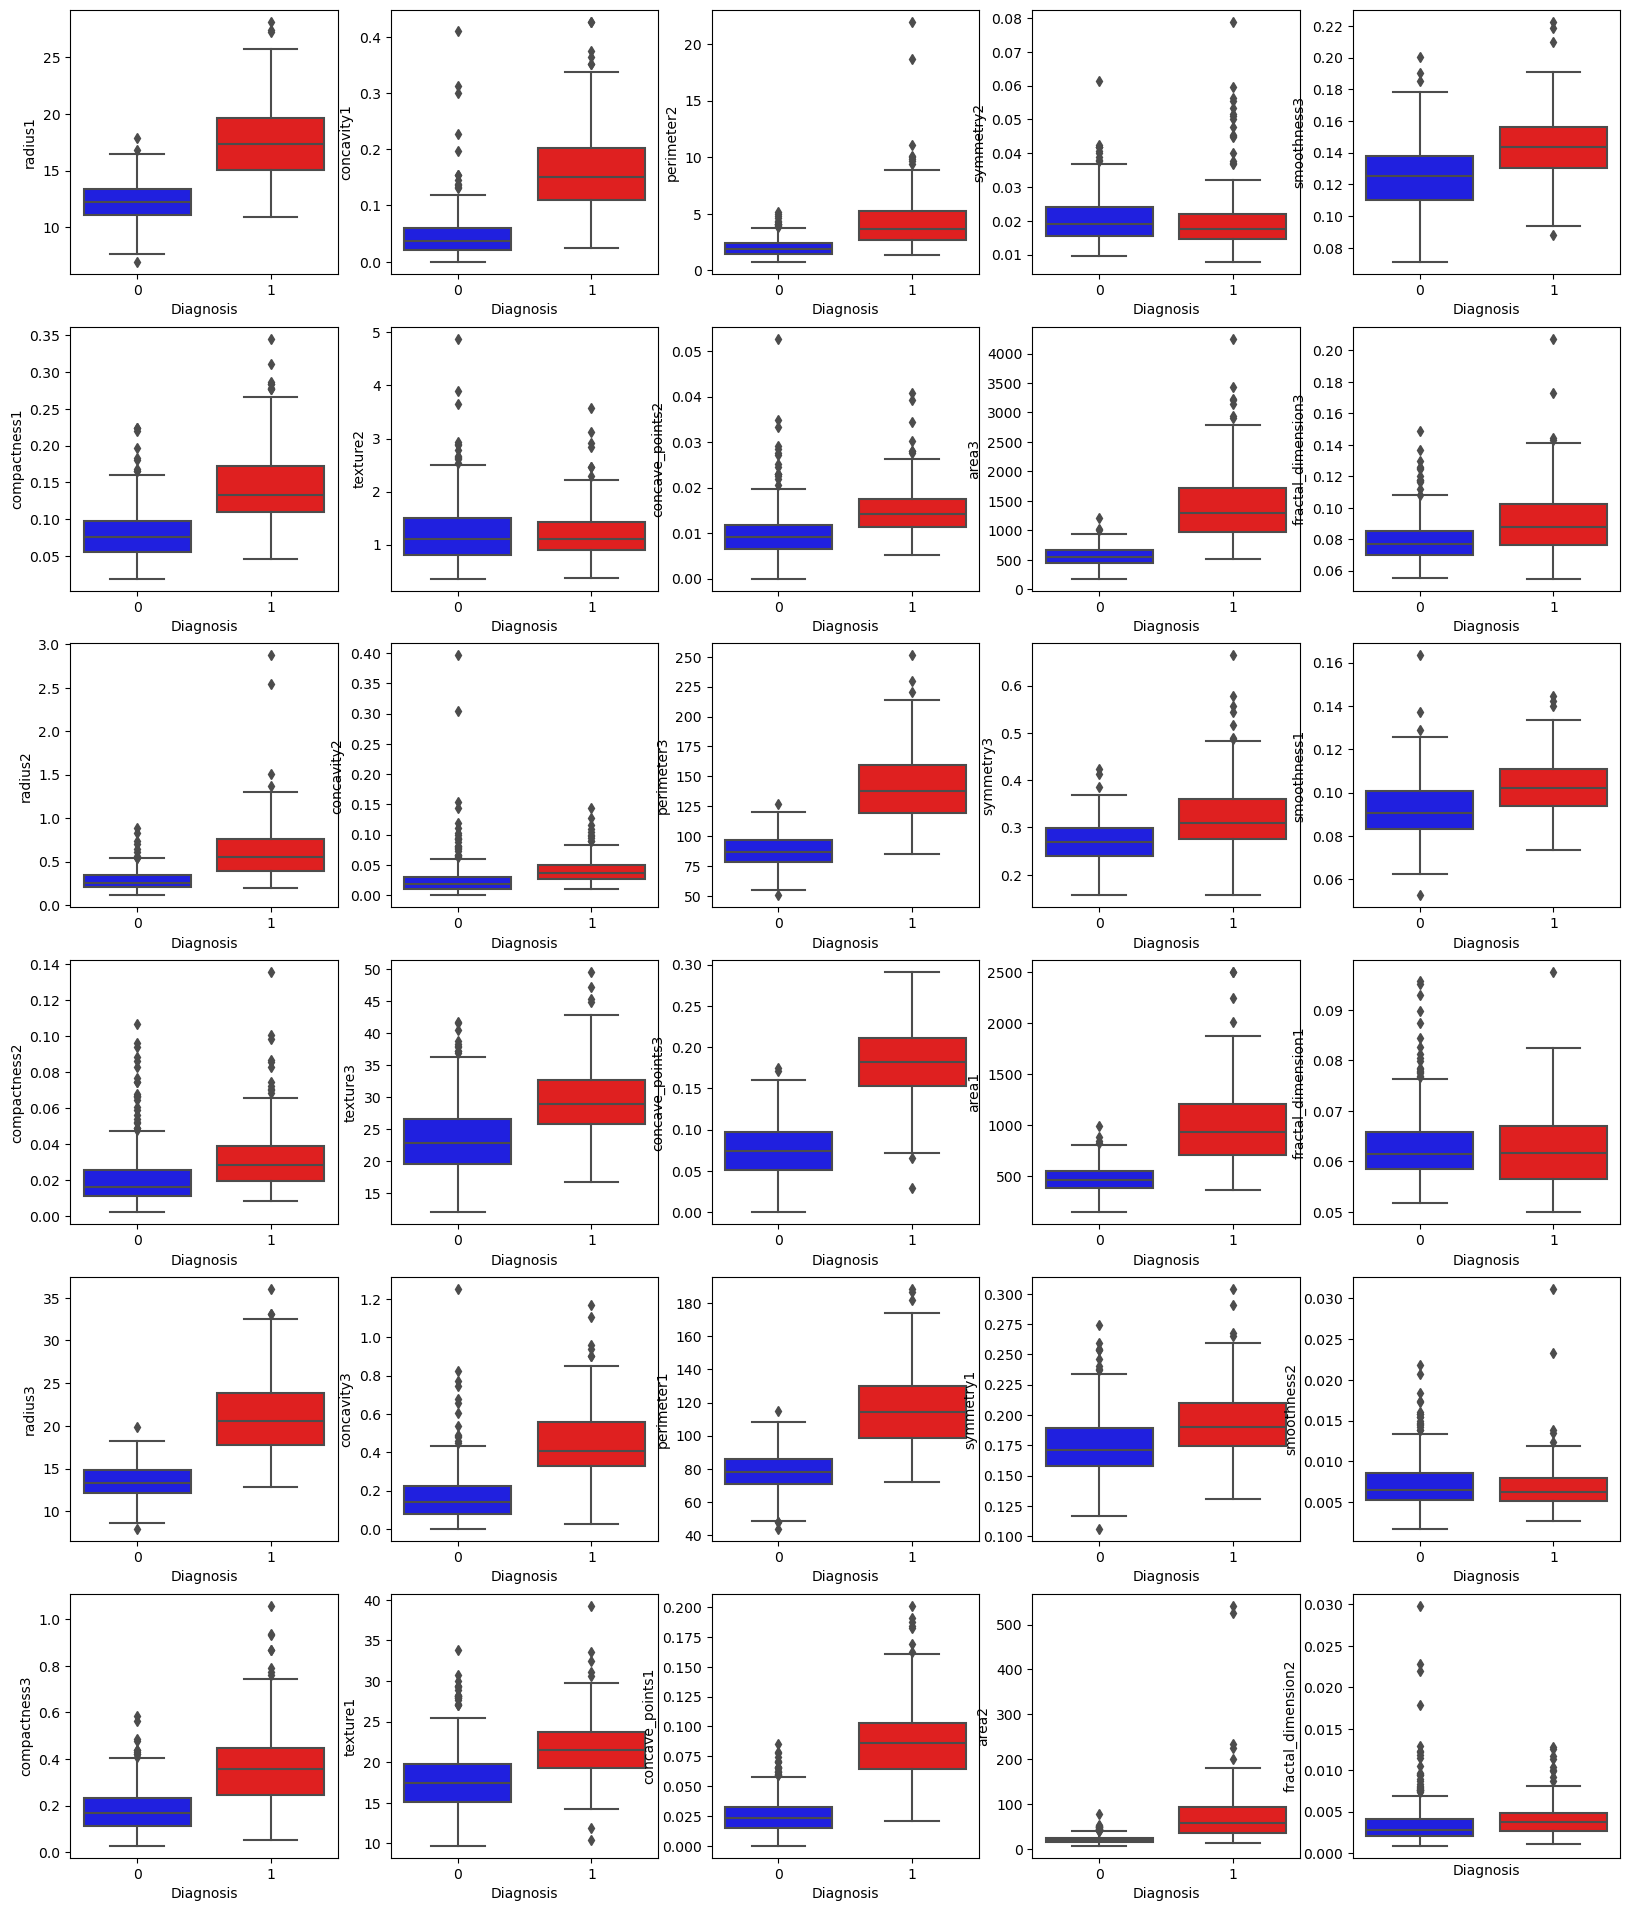

In [15]:
# Visualize individually the relation of the features with the Diagnostic through bar charts.
fig, ax = plt.subplots(6,5,figsize=(20,24))
for i in range(0,6):
    for j in range(0,5):
        sns.boxplot(ax = ax[i,j], data=df, x= 'Diagnosis', y= features[(5*i + 6*j)%30], palette = pal)
        plt.xticks([])
plt.show()

In [16]:
features1.append("Diagnosis")

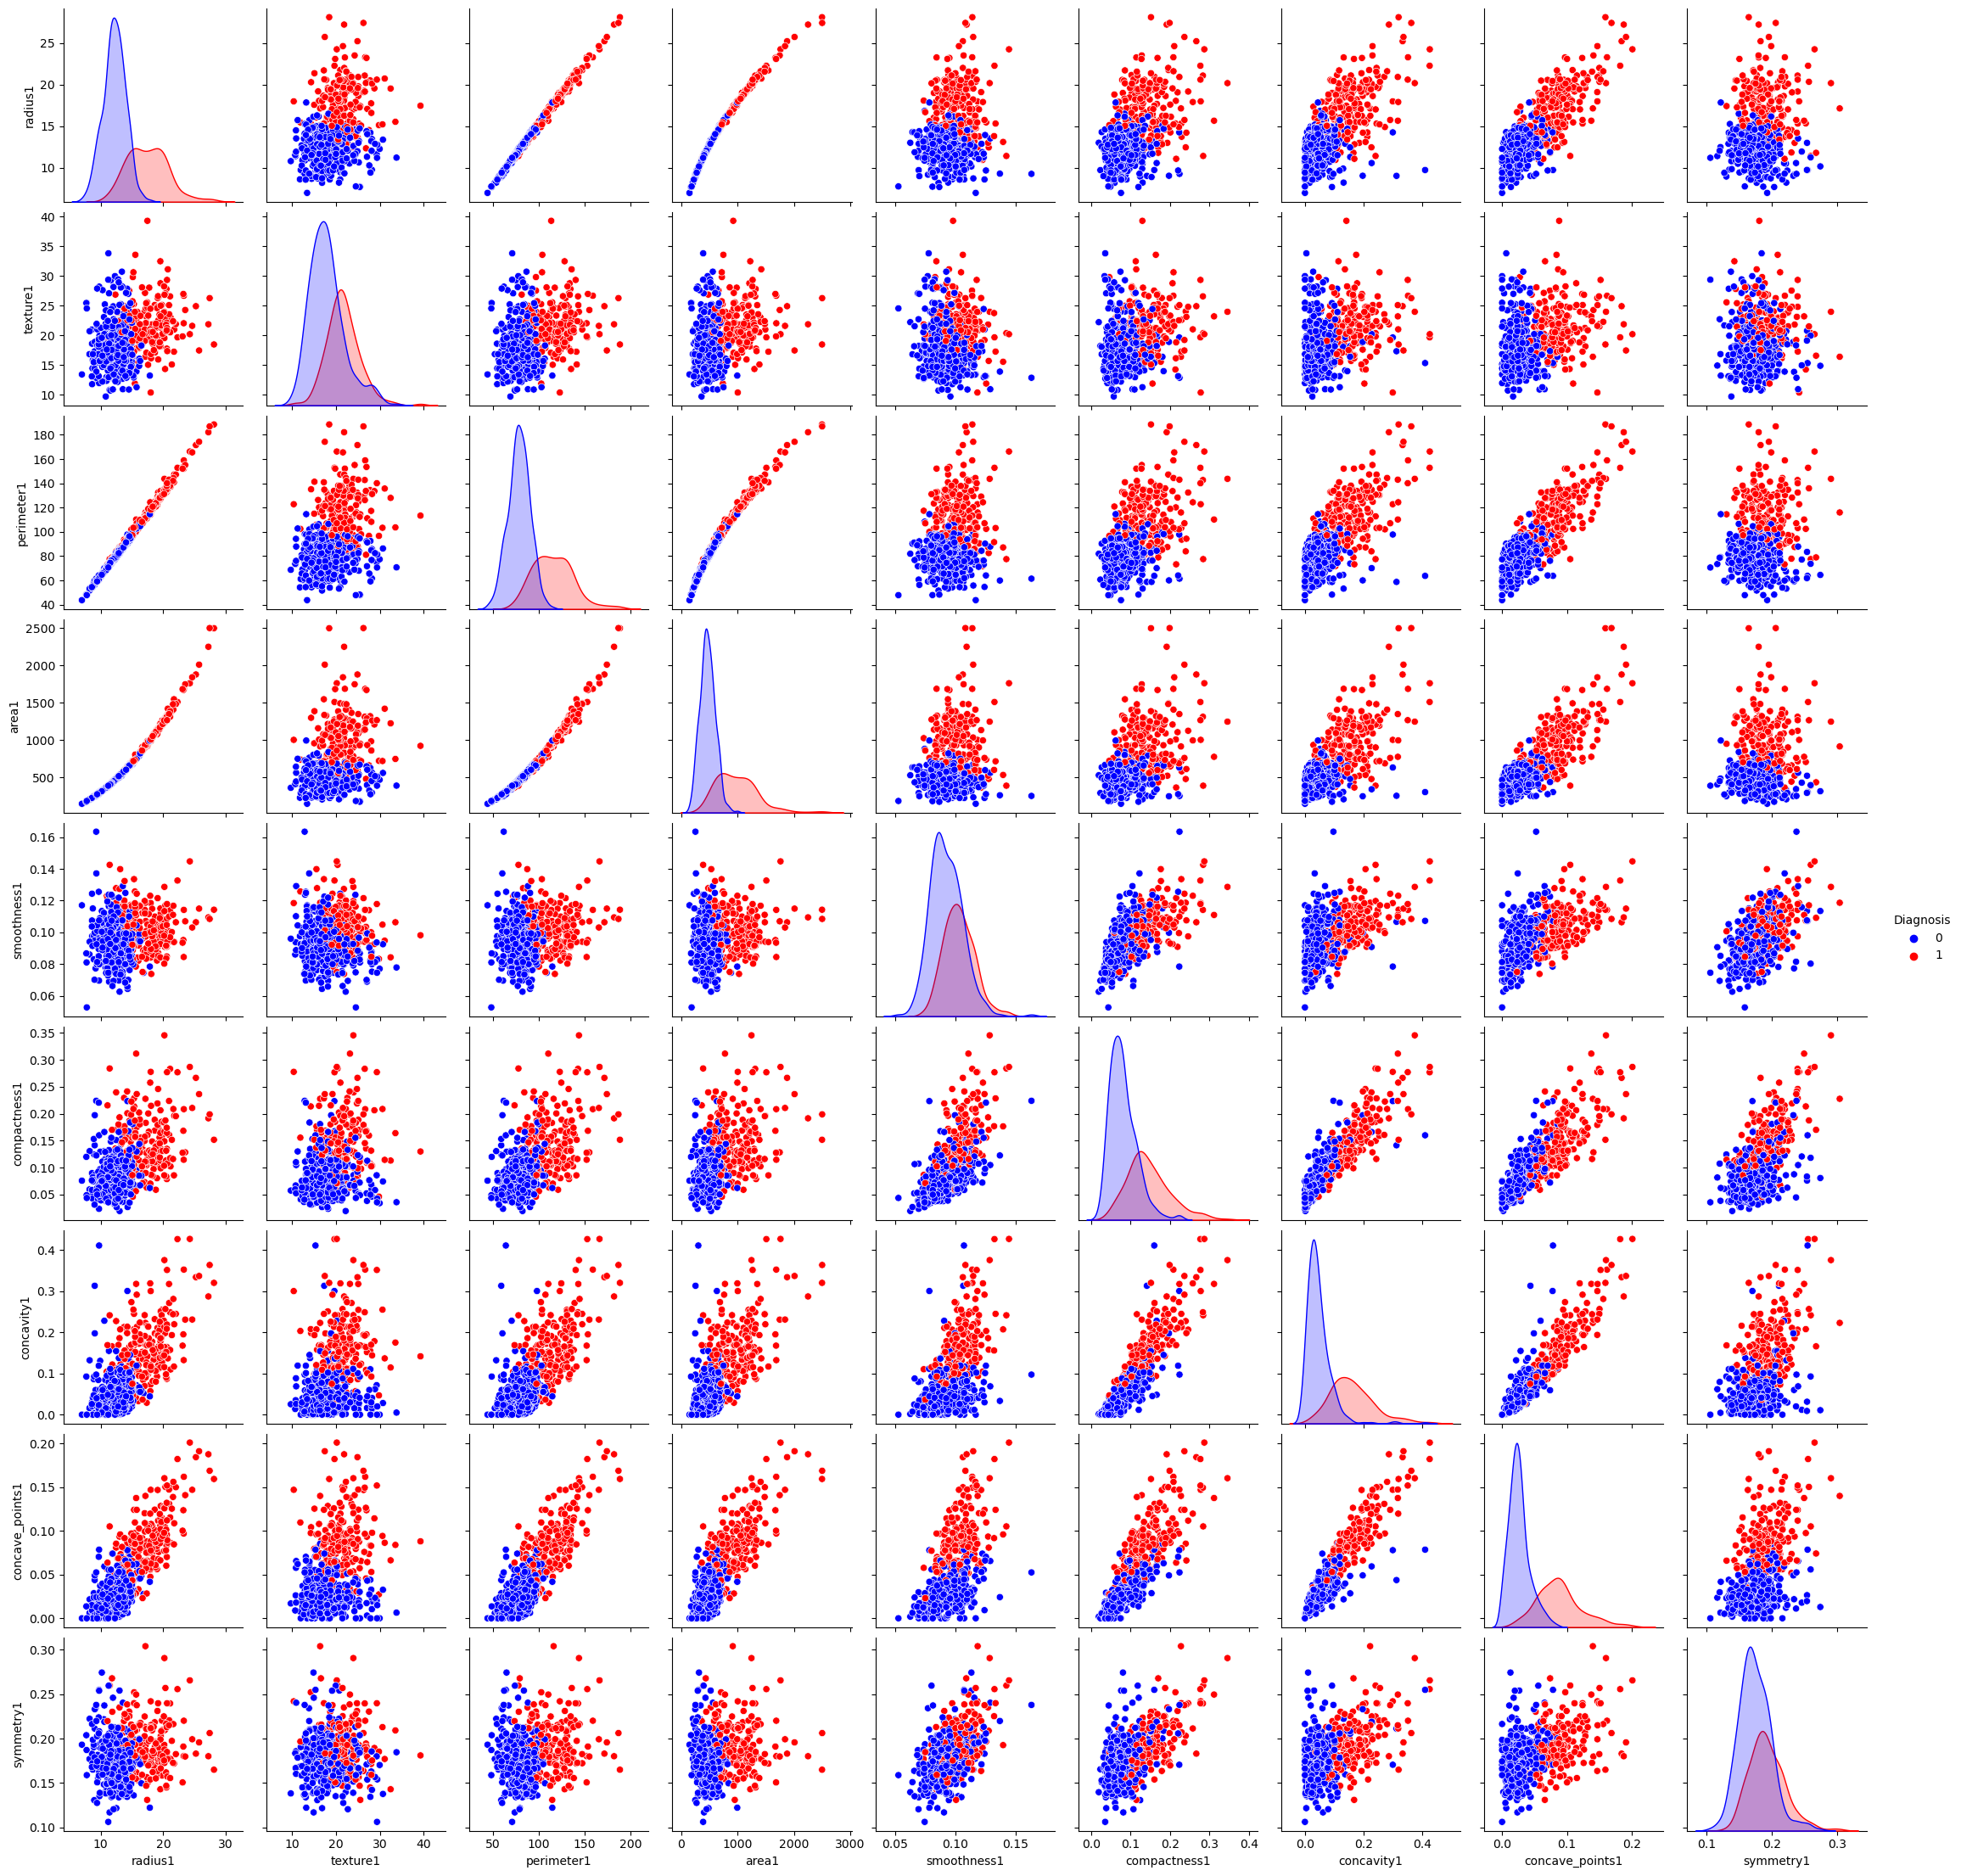

In [17]:
# Visualize relations of each feature with the Diagnosis
sns.pairplot(data=df[features1], hue='Diagnosis', palette = pal)

We see that some variables are highly correlated (radius, area, perimeter), and that malignant seems to occur more when the value of the features is greater.

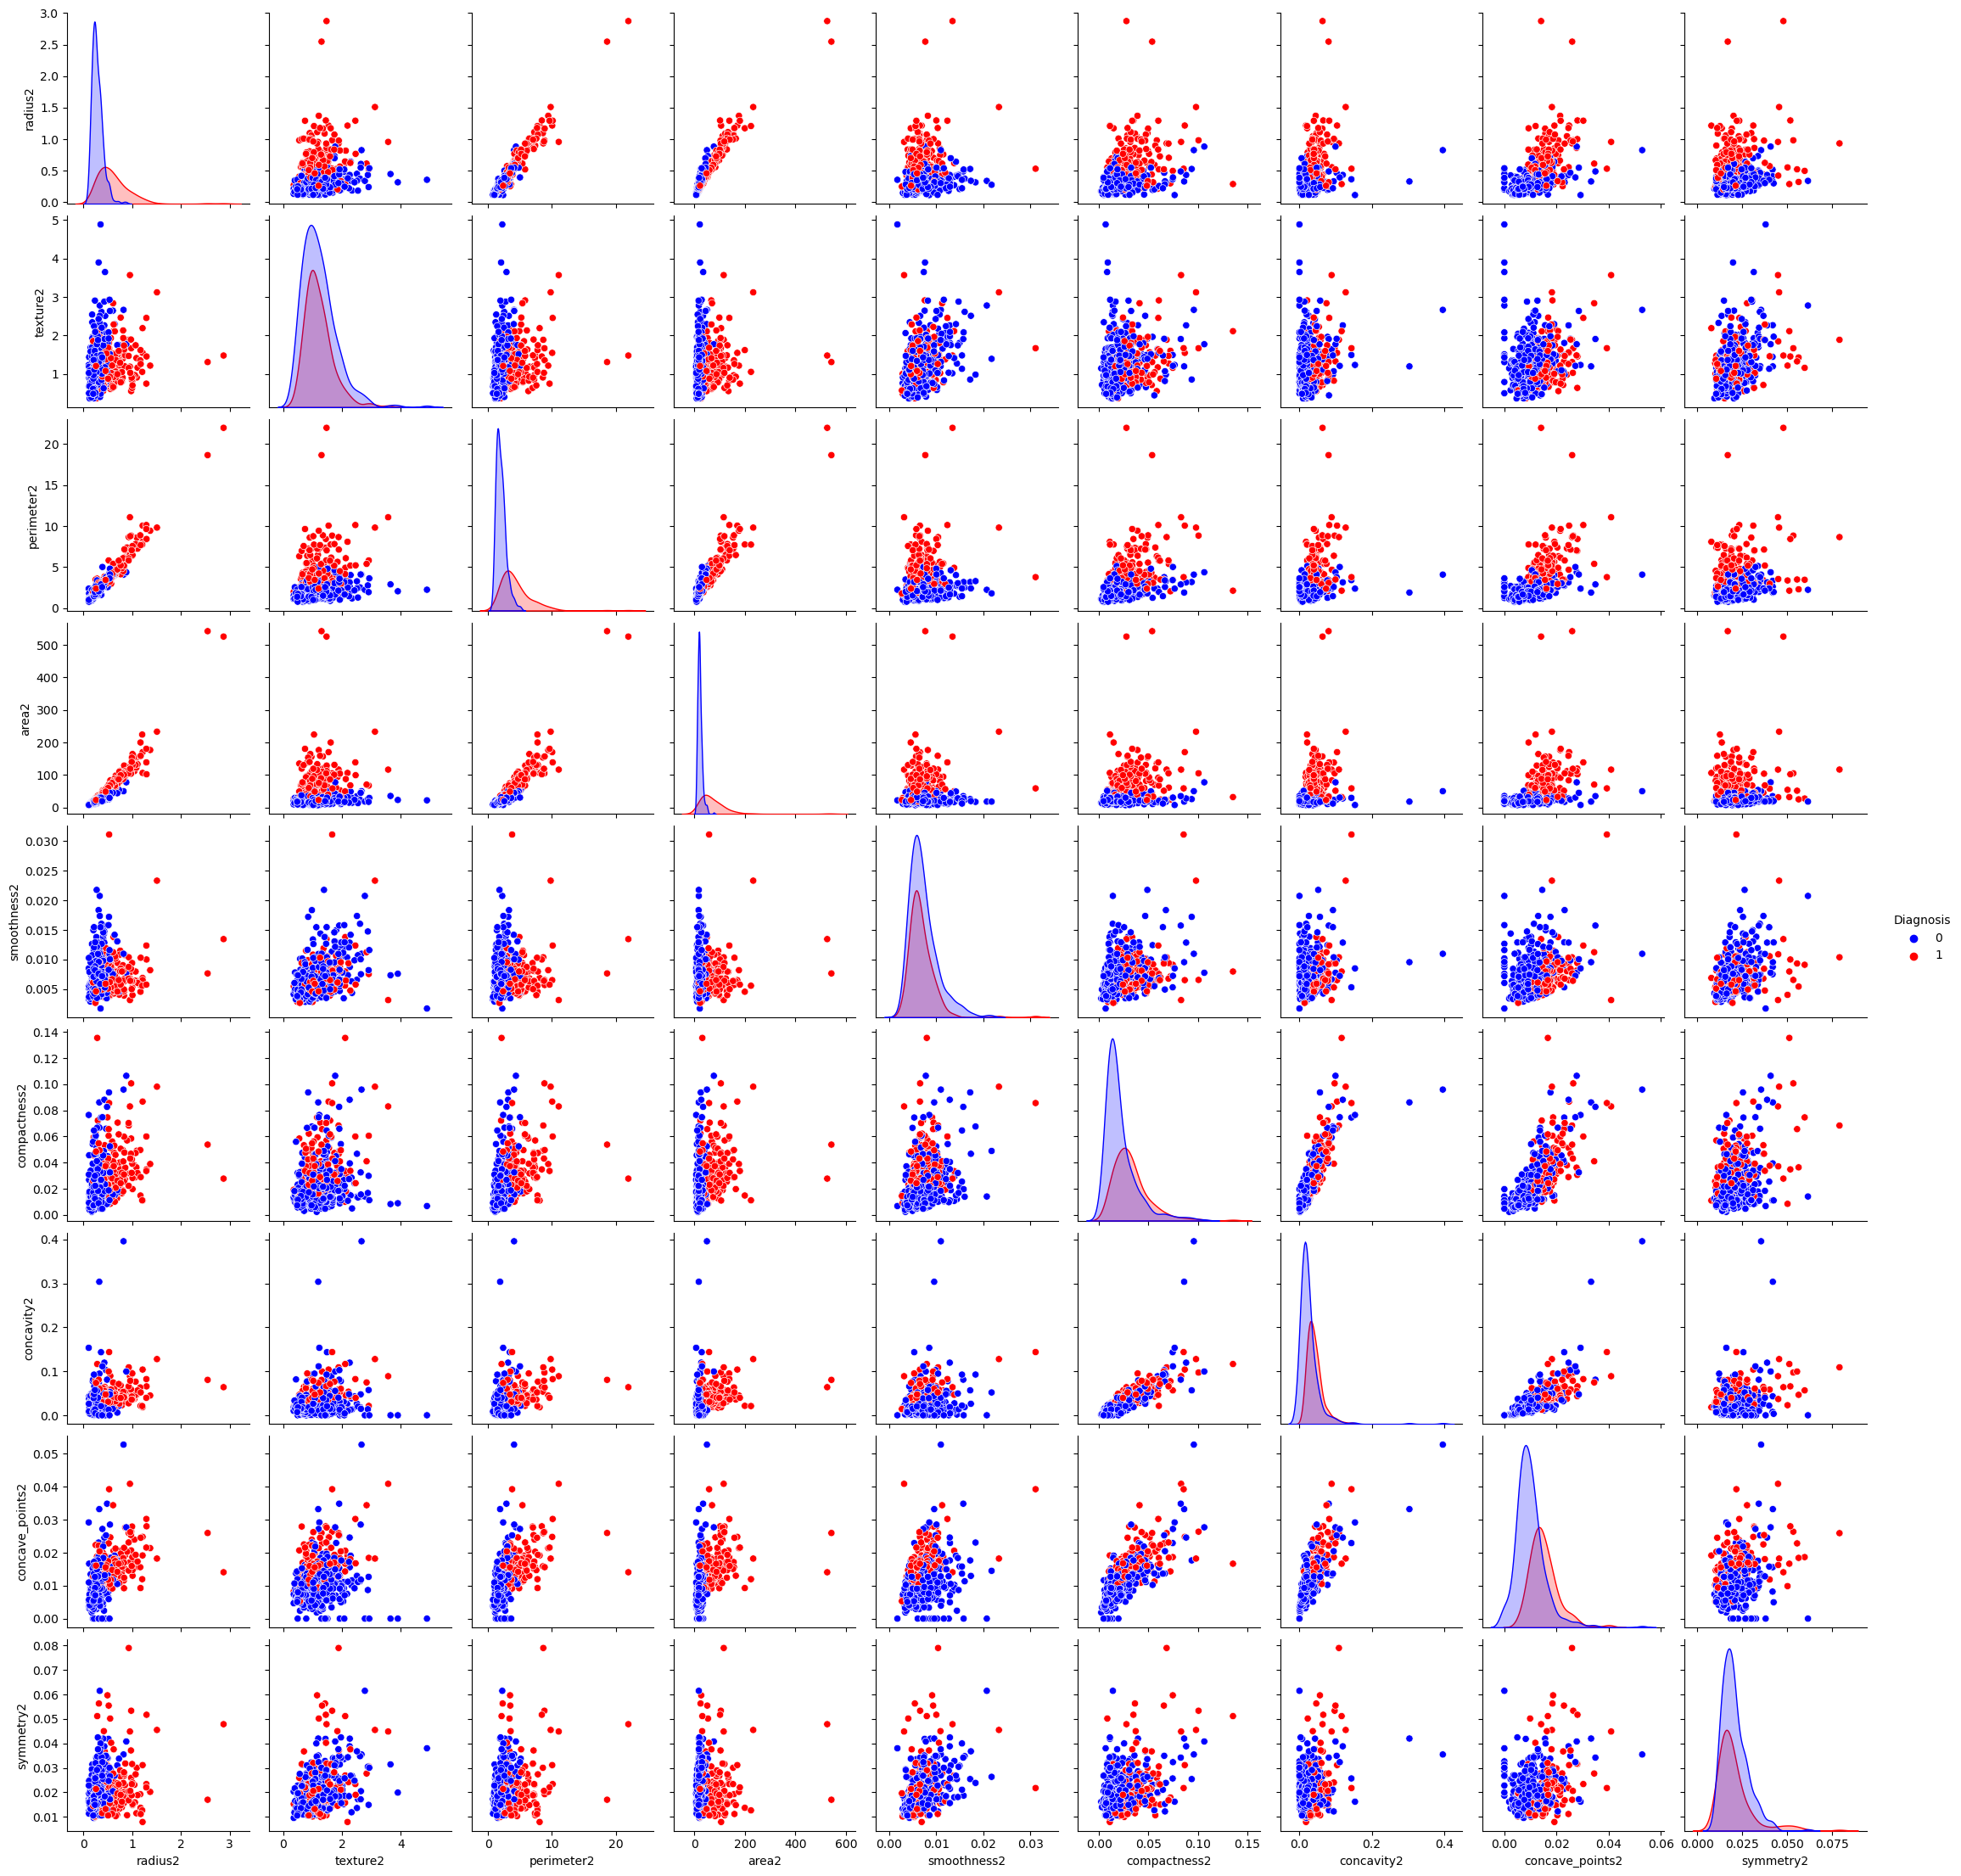

In [18]:
# The same visualization for variables 2

features2.append("Diagnosis")
sns.pairplot(data=df[features2], hue='Diagnosis', palette = pal)

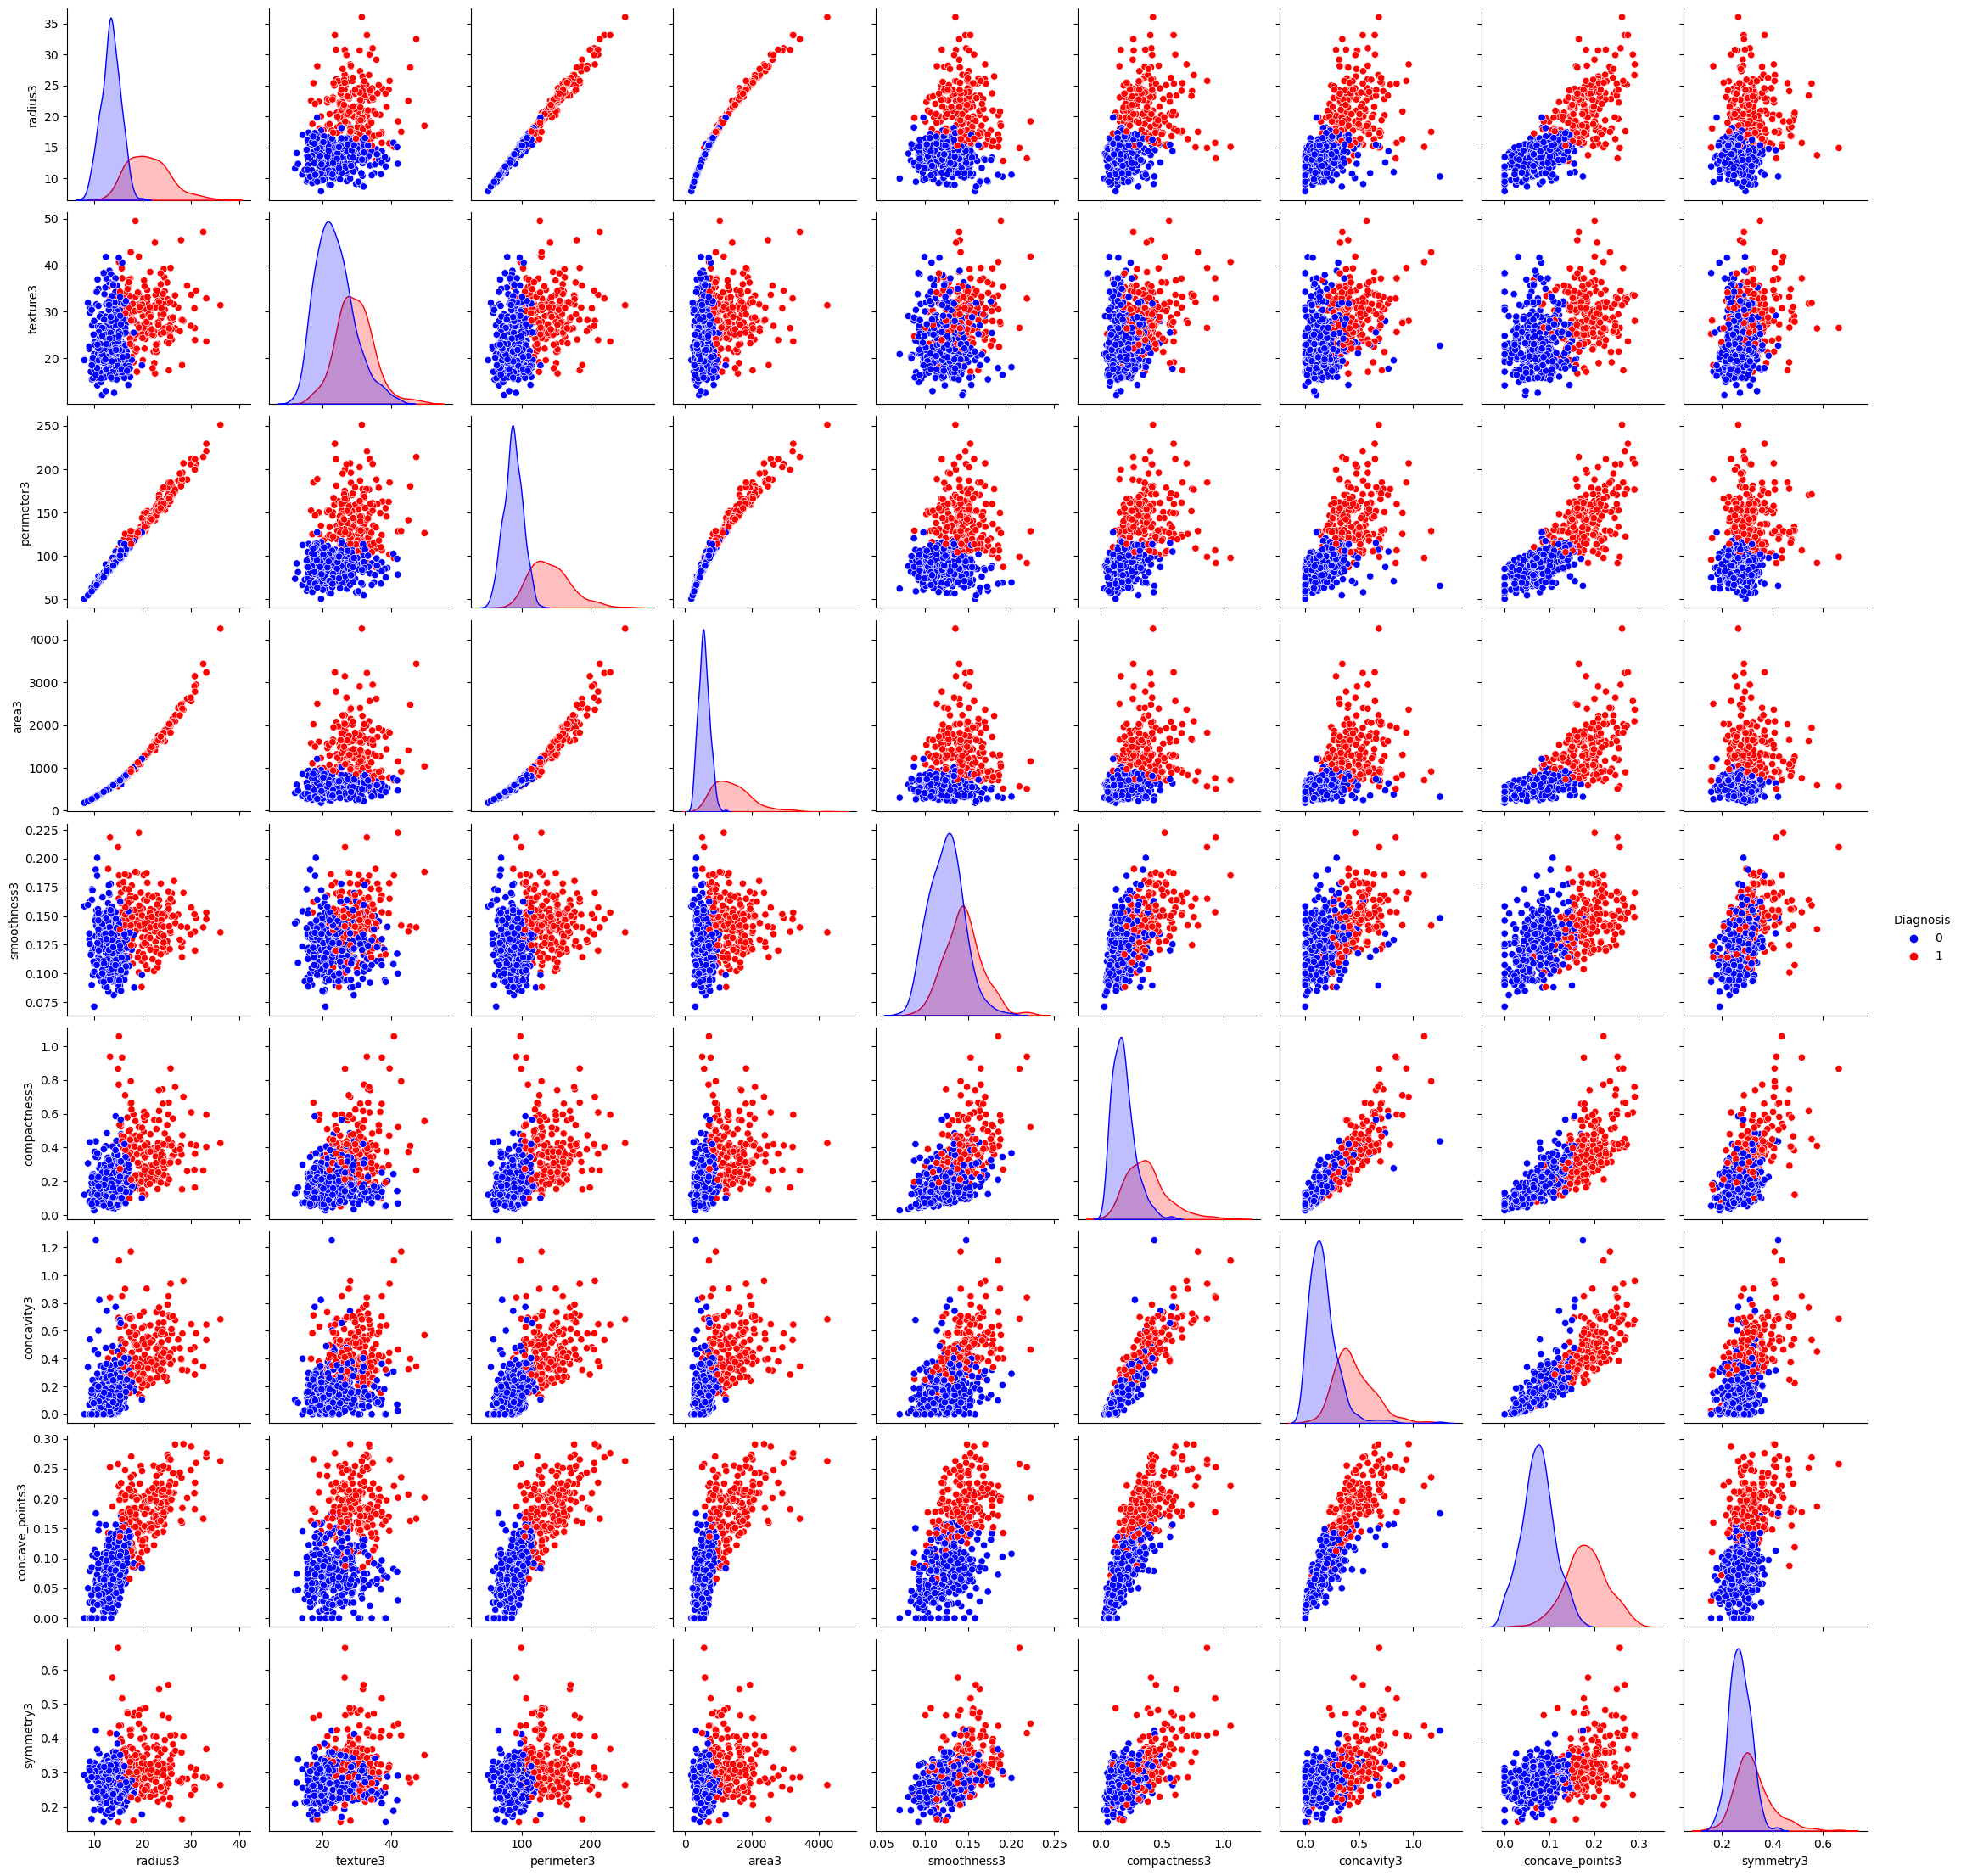

In [19]:
# The same visualization for variables 3

features3.append("Diagnosis")
sns.pairplot(data=df[features3], hue='Diagnosis', palette = pal)

## 2.2 Correlation between variables

In [20]:
# Matrix of correlations
corr = df.drop("Diagnosis", axis=1).corr().round(2)
corr

radius1  texture1  perimeter1  area1  smoothness1  \
radius1                1.00      0.32        1.00   0.99         0.17   
texture1               0.32      1.00        0.33   0.32        -0.02   
perimeter1             1.00      0.33        1.00   0.99         0.21   
area1                  0.99      0.32        0.99   1.00         0.18   
smoothness1            0.17     -0.02        0.21   0.18         1.00   
compactness1           0.51      0.24        0.56   0.50         0.66   
concavity1             0.68      0.30        0.72   0.69         0.52   
concave_points1        0.82      0.29        0.85   0.82         0.55   
symmetry1              0.15      0.07        0.18   0.15         0.56   
fractal_dimension1    -0.31     -0.08       -0.26  -0.28         0.58   
radius2                0.68      0.28        0.69   0.73         0.30   
texture2              -0.10      0.39       -0.09  -0.07         0.07   
perimeter2             0.67      0.28        0.69   0.73         0.30   
area2                  0.74      0.26        0.74   0.80         0.25   
smoothness2           -0.22      0.01       -0.20  -0.17         0.33   
compactness2           0.21      0.19        0.25   0.21         0.32   
concavity2             0.19      0.14        0.23   0.21         0.25   
concave_points2        0.38      0.16        0.41   0.37         0.38   
symmetry2             -0.10      0.01       -0.08  -0.07         0.20   
fractal_dimension2    -0.04      0.05       -0.01  -0.02         0.28   
radius3                0.97      0.35        0.97   0.96         0.21   
texture3               0.30      0.91        0.30   0.29         0.04   
perimeter3             0.97      0.36        0.97   0.96         0.24   
area3                  0.94      0.34        0.94   0.96         0.21   
smoothness3            0.12      0.08        0.15   0.12         0.81   
compactness3           0.41      0.28        0.46   0.39         0.47   
concavity3             0.53      0.30        0.56   0.51         0.43   
concave_points3        0.74      0.30        0.77   0.72         0.50   
symmetry3              0.16      0.11        0.19   0.14         0.39   
fractal_dimension3     0.01      0.12        0.05   0.00         0.50   

                    compactness1  concavity1  concave_points1  symmetry1  \
radius1                     0.51        0.68             0.82       0.15   
texture1                    0.24        0.30             0.29       0.07   
perimeter1                  0.56        0.72             0.85       0.18   
area1                       0.50        0.69             0.82       0.15   
smoothness1                 0.66        0.52             0.55       0.56   
compactness1                1.00        0.88             0.83       0.60   
concavity1                  0.88        1.00             0.92       0.50   
concave_points1             0.83        0.92             1.00       0.46   
symmetry1                   0.60        0.50             0.46       1.00   
fractal_dimension1          0.57        0.34             0.17       0.48   
radius2                     0.50        0.63             0.70       0.30   
texture2                    0.05        0.08             0.02       0.13   
perimeter2                  0.55        0.66             0.71       0.31   
area2                       0.46        0.62             0.69       0.22   
smoothness2                 0.14        0.10             0.03       0.19   
compactness2                0.74        0.67             0.49       0.42   
concavity2                  0.57        0.69             0.44       0.34   
concave_points2             0.64        0.68             0.62       0.39   
symmetry2                   0.23        0.18             0.10       0.45   
fractal_dimension2          0.51        0.45             0.26       0.33   
radius3                     0.54        0.69             0.83       0.19   
texture3                    0.25        0.30             0.29       0.09   
perimete

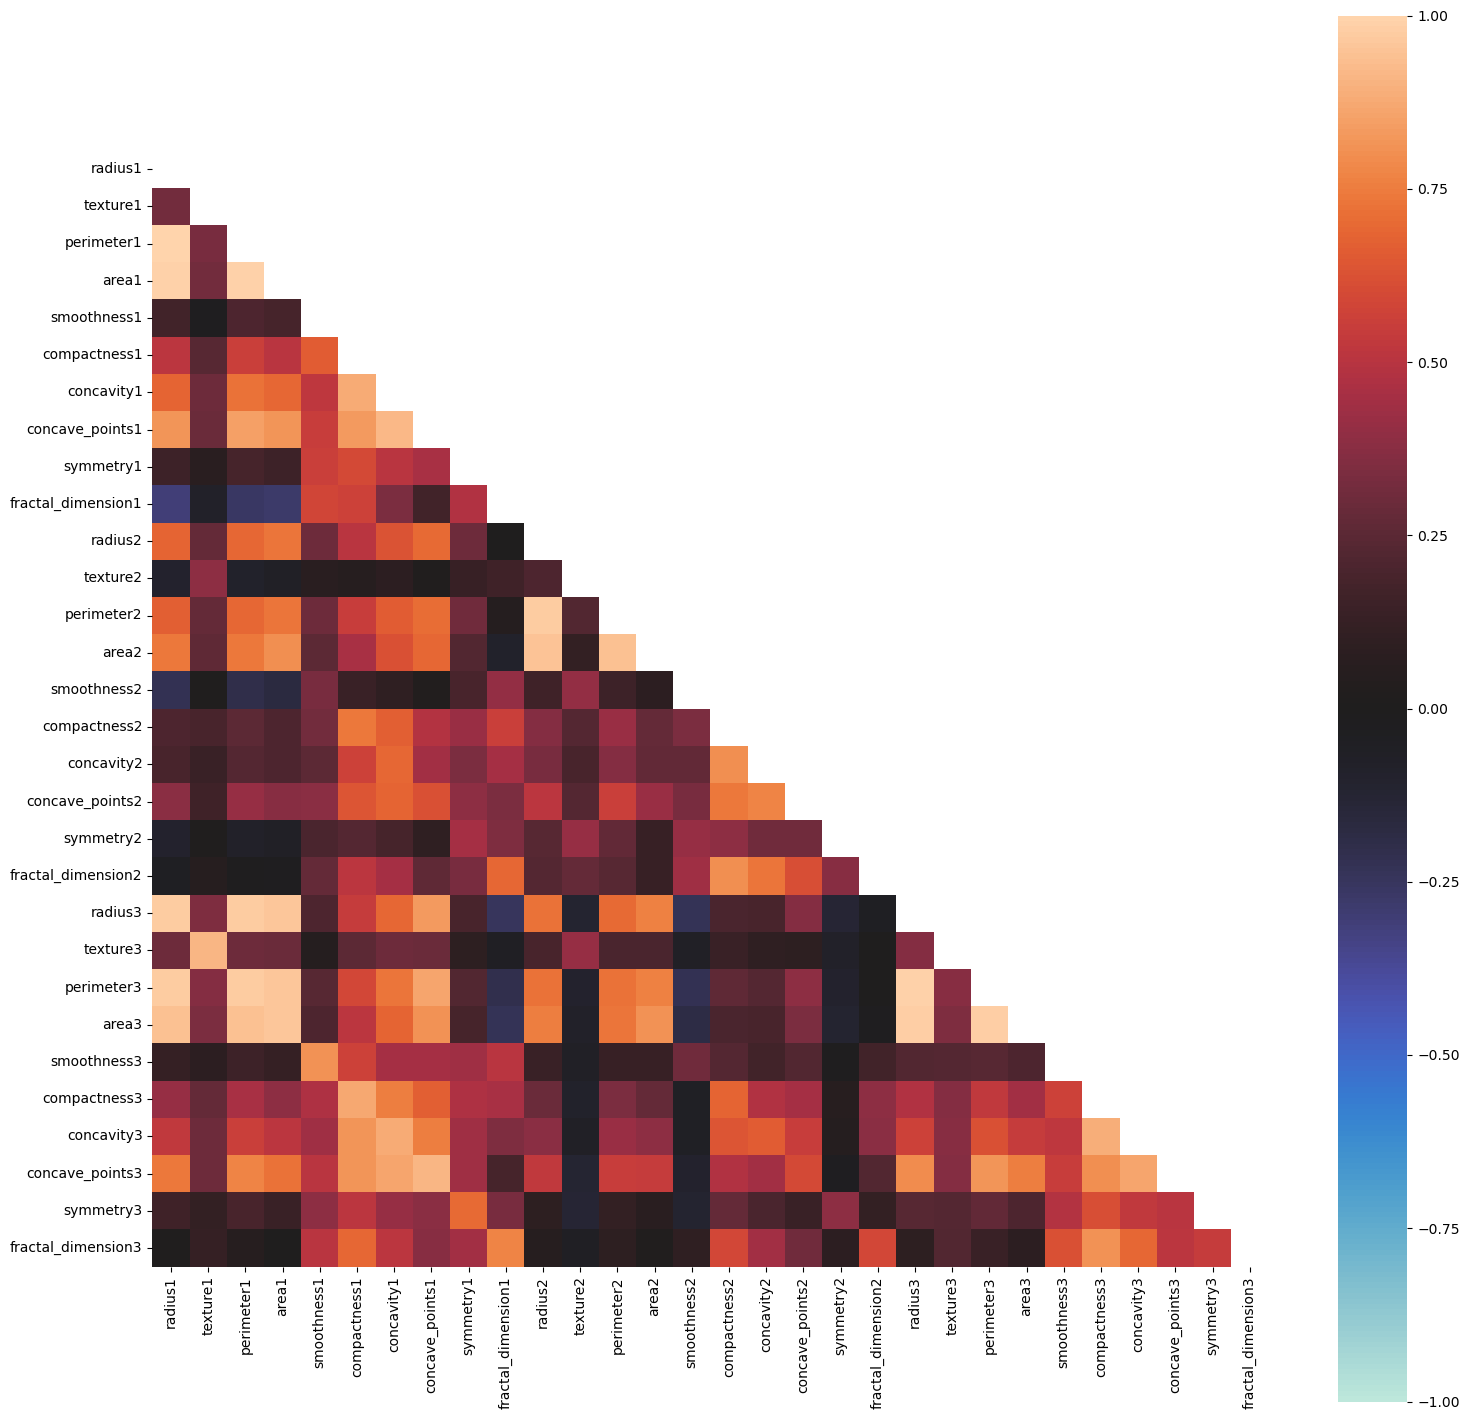

In [21]:
# Visualize the correlations

# Code to remove the superior triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

# Draw the heatmap
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, mask=mask, square=True, annot=True)
plt.show()

# 3. Machine Learning Models for Classification

In this Section, we will perform 9 models of Machine Learning of Classification, in order to compare them and see which one will have the best performance. These models correspond to the following algorithms:

+ 3.1 - Logistic Regression
+ 3.2 - Decision Tree
+ 3.3 - Random Forest
+ 3.4 - Support Vector Machine (SVM)
+ 3.5 - XGBoost
+ 3.6 - Naive-Bayes
+ 3.7 - K-Nearest Neighbors (KNN)
+ 3.8 - LigthGBM
+ 3.9 - Catboost

### Split into train and test

In [22]:
# Import libraries
from sklearn.model_selection import train_test_split

# Split into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
df_train = pd.merge(X_train,y_train, how='inner', left_index=True, right_index=True)

### Feature Scaling

In [23]:
# Import library
from sklearn.preprocessing import StandardScaler

# Create the Scaler
sc = StandardScaler()

# Scale the X variables
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [24]:
X_train_scaled

array([[-0.74998027, -1.09978744, -0.74158608, ..., -0.6235968 ,
         0.07754241,  0.45062841],
       [-1.02821446, -0.1392617 , -1.02980434, ..., -0.7612376 ,
        -1.07145262, -0.29541379],
       [-0.53852228, -0.29934933, -0.56857428, ..., -0.50470441,
         0.34900827, -0.13371556],
       ...,
       [-1.3214733 , -0.20855336, -1.3143845 , ..., -0.98621857,
        -0.69108476, -0.13148524],
       [-1.24245479, -0.23244704, -1.27759928, ..., -1.7562754 ,
        -1.55125275, -1.01078909],
       [-0.74441558,  1.13188181, -0.72016173, ..., -0.28490593,
        -1.2308599 ,  0.20083251]])

In [25]:
X_test_scaled

array([[-0.21855296,  0.31710749, -0.14938447, ...,  1.36998461,
         1.0939611 ,  1.51560644],
       [-0.27141746,  1.44727832, -0.33290634, ..., -0.84095647,
        -0.70686766, -0.88310324],
       [-0.04604776, -0.84412512, -0.11098232, ..., -0.50394228,
        -1.19298094, -0.92659449],
       ...,
       [-0.13230036, -0.12253613, -0.14574637, ...,  0.20087616,
        -0.06766026,  0.36754897],
       [-0.24637638,  0.56799108, -0.28682376, ..., -0.90055508,
        -0.40225771, -0.95558866],
       [-1.35013142,  0.65639767, -1.34712739, ..., -1.36545479,
        -0.72107227, -0.54576727]])

## 3.1 Logistic Regression

In [26]:
# Import the library
from sklearn.linear_model import LogisticRegression

In [27]:
# Create and Fit the Logistic Model
model1 = LogisticRegression(random_state=0)
model1.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [28]:
# Predict the result
y_pred1 = model1.predict(X_test_scaled)

In [29]:
# Evaluate the model

# Import libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[107   1]
 [  3  60]]


In [30]:
# Trues and falses positives and negatives

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("True negative: ", TN)
print("False positive: ", FP)
print("False negative: ", FN)
print("True positive: ", TP)

True negative:  107
False positive:  1
False negative:  3
True positive:  60


In [31]:
# Accuracy, precision, recall, and F1 score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred1)
print(f"Balanced Accuracy: {balanced_accuracy:.8f}")

accuracy_1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy_1:.8f}")

precision_1 = precision_score(y_test, y_pred1)   
print(f"Precision: {precision_1:.8f}")

recall_1 = recall_score(y_test, y_pred1)  # Matches of Malignants
print(f"Recall: {recall_1:.8f}")

f1_1 = f1_score(y_test, y_pred1)
print(f"F1 Score: {f1_1:.8f}")

Balanced Accuracy: 0.97156085
Accuracy: 0.97660819
Precision: 0.98360656
Recall: 0.95238095
F1 Score: 0.96774194


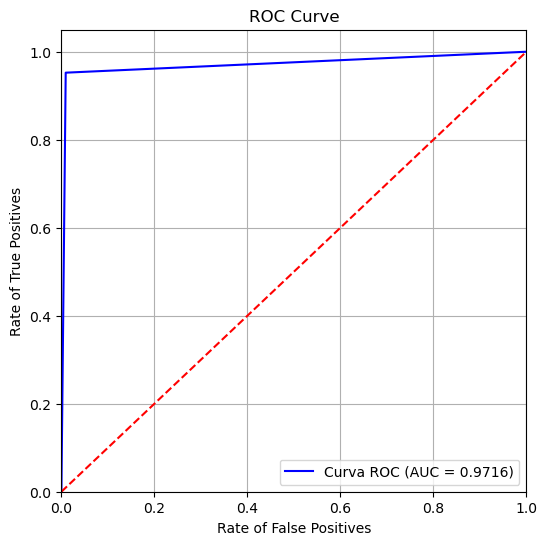

In [32]:
# ROC curve

# Import libraries
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc_1 = auc(fpr, tpr)  # Area under the curve

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rate of False Positives')
plt.ylabel('Rate of True Positives')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [33]:
# Create a table with the results
results = pd.DataFrame([["Logistic Regression",accuracy_1,precision_1,recall_1,f1_1, roc_auc_1]],columns=['Model','Accuracy','Precision', 'Recall','F1 score', 'AUC ROC score'])
results

Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0  Logistic Regression  0.976608   0.983607  0.952381  0.967742       0.971561

In [34]:
# Cross validation

# Import library
from sklearn.model_selection import cross_val_score

# Cross validate
accuracies = cross_val_score(estimator=model1,X=X_train_scaled,y=y_train,cv=5)
print("Accuracy : ",accuracies.mean())
print("Std Deviation : ",round(accuracies.std(),4))

Accuracy :  0.985
Std Deviation :  0.0184


## 3.2 Decision Tree

In [35]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier

In [36]:
# Initialize the Decision Tree Classifier
model2 = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
model2.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred2 = model2.predict(X_test_scaled)

In [37]:
# Function to evaluate model

def evaluate_model(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    print("True negative: ", TN)
    print("False positive: ", FP)
    print("False negative: ", FN)
    print("True positive: ", TP)

    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    print(f"Balanced Accuracy: {balanced_accuracy:.8f}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.8f}")
    precision = precision_score(y_test, y_pred)   
    print(f"Precision: {precision:.8f}")
    recall = recall_score(y_test, y_pred)  # Matches of Malignants
    print(f"Recall: {recall:.8f}")
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1:.8f}")

    return accuracy, precision, recall, f1

In [38]:
# Evaluate Model 2
print("Evaluation of Model 2:\n")
accuracy_2, precision_2, recall_2, f1_2 = evaluate_model(y_test, y_pred2)

Evaluation of Model 2:

Confusion Matrix:
[[97 11]
 [ 4 59]]
True negative:  97
False positive:  11
False negative:  4
True positive:  59
Balanced Accuracy: 0.91732804
Accuracy: 0.91228070
Precision: 0.84285714
Recall: 0.93650794
F1 Score: 0.88721805


In [39]:
# Function to calculate and plot the ROC curve

def roc_curve_plot(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Rate of False Positives')
    plt.ylabel('Rate of True Positives')
    plt.title('ROC Curve of Model')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return roc_auc

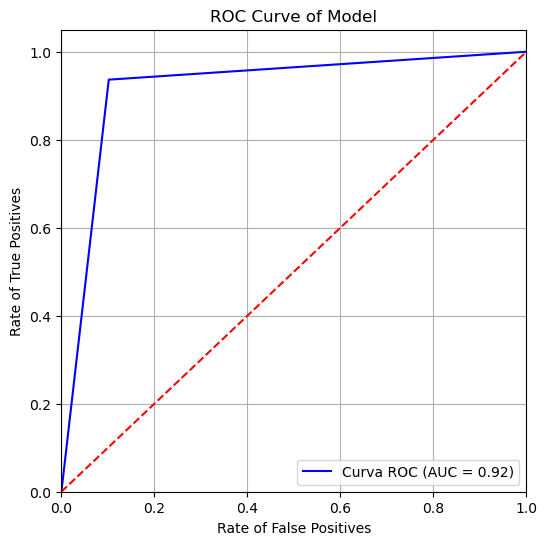

In [40]:
# Calculate the ROC curve
roc_auc_2 = roc_curve_plot(y_test, y_pred2)

In [41]:
# Results of Model 2
results_2 = pd.DataFrame([["Decision tree",accuracy_2,precision_2,recall_2,f1_2, roc_auc_2]],columns=['Model','Accuracy','Precision', 'Recall','F1 score', 'AUC ROC score'])
print(results_2)

# Add results to the table
results = pd.concat([results, results_2], ignore_index=True)

           Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0  Decision tree  0.912281   0.842857  0.936508  0.887218       0.917328


## 3.3 Random Forest

Evaluation of Model 3:

Confusion Matrix:
[[104   4]
 [  3  60]]
True negative:  104
False positive:  4
False negative:  3
True positive:  60
Balanced Accuracy: 0.95767196
Accuracy: 0.95906433
Precision: 0.93750000
Recall: 0.95238095
F1 Score: 0.94488189


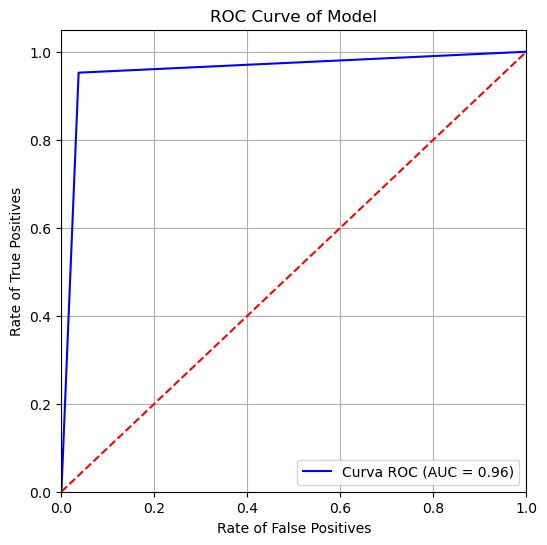

           Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0  Random Forest  0.959064     0.9375  0.952381  0.944882       0.957672


In [42]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize
model3 = RandomForestClassifier(random_state=0)

# Fit the model on the training data
model3.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred3 = model3.predict(X_test_scaled)

# Evaluate Model
print("Evaluation of Model 3:\n")
accuracy_3, precision_3, recall_3, f1_3 = evaluate_model(y_test, y_pred3)

# Calculate the ROC curve
roc_auc_3 = roc_curve_plot(y_test, y_pred3)

# Results of Model 3
results_3 = pd.DataFrame([["Random Forest",accuracy_3,precision_3,recall_3,f1_3, roc_auc_3]],columns=['Model','Accuracy','Precision', 'Recall','F1 score', 'AUC ROC score'])
print(results_3)

# Add results to the table
results = pd.concat([results, results_3], ignore_index=True)

## 3.4 Support Vector Machine (SVM)

Evaluation of Model 4:

Confusion Matrix:
[[103   5]
 [  2  61]]
True negative:  103
False positive:  5
False negative:  2
True positive:  61
Balanced Accuracy: 0.96097884
Accuracy: 0.95906433
Precision: 0.92424242
Recall: 0.96825397
F1 Score: 0.94573643


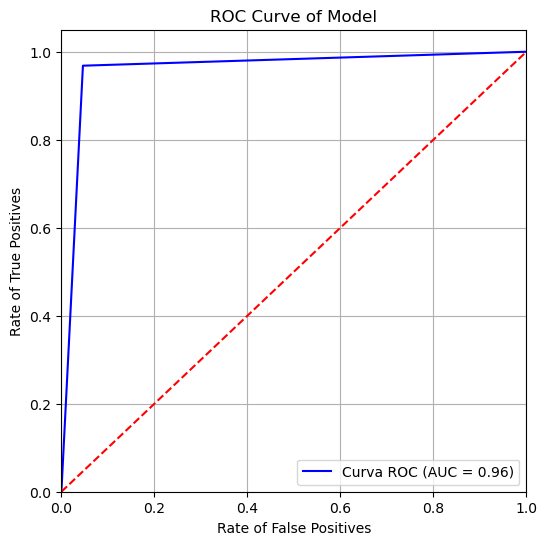

  Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0   SVM  0.959064   0.924242  0.968254  0.945736       0.960979


In [43]:
# Import libraries
from sklearn.svm import SVC

# Initialize
model4 = SVC(kernel='linear', random_state=0)

# Fit the model on the training data
model4.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred4 = model4.predict(X_test_scaled)

# Evaluate Model
print("Evaluation of Model 4:\n")
accuracy_4, precision_4, recall_4, f1_4 = evaluate_model(y_test, y_pred4)

# Calculate the ROC curve
roc_auc_4 = roc_curve_plot(y_test, y_pred4)

# Results of Model 4
results_4 = pd.DataFrame([["SVM",accuracy_4,precision_4,recall_4,f1_4, roc_auc_4]],columns=['Model','Accuracy','Precision', 'Recall','F1 score', 'AUC ROC score'])
print(results_4)

# Add results to the table
results = pd.concat([results, results_4], ignore_index=True)

## 3.5 XGBoost classification

Evaluation of Model 5:

Confusion Matrix:
[[106   2]
 [  2  61]]
True negative:  106
False positive:  2
False negative:  2
True positive:  61
Balanced Accuracy: 0.97486772
Accuracy: 0.97660819
Precision: 0.96825397
Recall: 0.96825397
F1 Score: 0.96825397


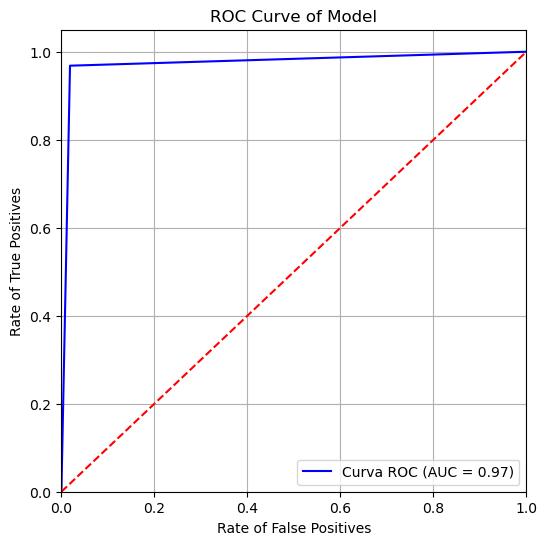

     Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0  XGBoost  0.976608   0.968254  0.968254  0.968254       0.974868


In [44]:
# Import libraries
from xgboost import XGBClassifier

# Initialize 
model5 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Fit the model on the training data
model5.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred5 = model5.predict(X_test_scaled)

# Evaluate Model
print("Evaluation of Model 5:\n")
accuracy_5, precision_5, recall_5, f1_5 = evaluate_model(y_test, y_pred5)

# Calculate the ROC curve
roc_auc_5 = roc_curve_plot(y_test, y_pred5)

# Results of Model 5
results_5 = pd.DataFrame([["XGBoost",accuracy_5,precision_5,recall_5,f1_5, roc_auc_5]],columns=['Model','Accuracy','Precision', 'Recall','F1 score', 'AUC ROC score'])
print(results_5)

# Add results to the table
results = pd.concat([results, results_5], ignore_index=True)

## 3.6 Naive-Bayes

Evaluation of Model 6:

Confusion Matrix:
[[99  9]
 [ 6 57]]
True negative:  99
False positive:  9
False negative:  6
True positive:  57
Balanced Accuracy: 0.91071429
Accuracy: 0.91228070
Precision: 0.86363636
Recall: 0.90476190
F1 Score: 0.88372093


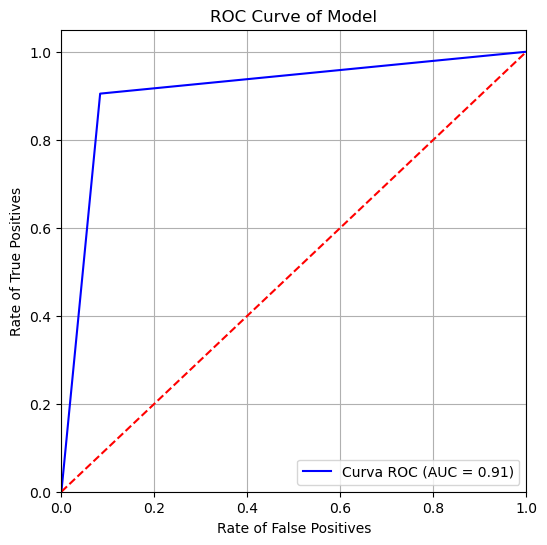

         Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0  Naive-Bayes  0.912281   0.863636  0.904762  0.883721       0.910714


In [45]:
# Import libraries
from sklearn.naive_bayes import GaussianNB

# Initialize 
model6 = GaussianNB()

# Fit the model on the training data
model6.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred6 = model6.predict(X_test_scaled)

# Evaluate Model
print("Evaluation of Model 6:\n")
accuracy_6, precision_6, recall_6, f1_6 = evaluate_model(y_test, y_pred6)

# Calculate the ROC curve
roc_auc_6 = roc_curve_plot(y_test, y_pred6)

# Results of Model 6
results_6 = pd.DataFrame([["Naive-Bayes",accuracy_6,precision_6,recall_6,f1_6, roc_auc_6]],columns=['Model','Accuracy','Precision', 'Recall','F1 score', 'AUC ROC score'])
print(results_6)

# Add results to the table
results = pd.concat([results, results_6], ignore_index=True)

## 3.7 K-Nearest Neighbors (KNN)

Evaluation of Model 7:

Confusion Matrix:
[[105   3]
 [  8  55]]
True negative:  105
False positive:  3
False negative:  8
True positive:  55
Balanced Accuracy: 0.92261905
Accuracy: 0.93567251
Precision: 0.94827586
Recall: 0.87301587
F1 Score: 0.90909091


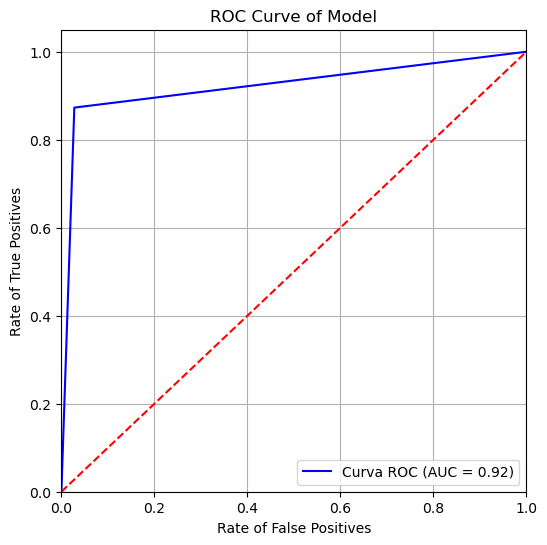

  Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0   KNN  0.935673   0.948276  0.873016  0.909091       0.922619


In [46]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier

# Initialize 
model7 = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
model7.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred7 = model7.predict(X_test_scaled)

# Evaluate Model
print("Evaluation of Model 7:\n")
accuracy_7, precision_7, recall_7, f1_7 = evaluate_model(y_test, y_pred7)

# Calculate the ROC curve
roc_auc_7 = roc_curve_plot(y_test, y_pred7)

# Results of Model 7
results_7 = pd.DataFrame([["KNN",accuracy_7,precision_7,recall_7,f1_7, roc_auc_7]],columns=['Model','Accuracy','Precision', 'Recall','F1 score', 'AUC ROC score'])
print(results_7)

# Add results to the table
results = pd.concat([results, results_7], ignore_index=True)

## 3.8 Ligth GBM

In [47]:
# Import libraries
from lightgbm import LGBMClassifier

# Initialize 
model8 = LGBMClassifier(random_state=0)

# Fit the model on the training data
model8.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred8 = model8.predict(X_test_scaled)

[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3970
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Evaluation of Model 8:

Confusion Matrix:
[[107   1]
 [  2  61]]
True negative:  107
False positive:  1
False negative:  2
True positive:  61
Balanced Accuracy: 0.97949735
Accuracy: 0.98245614
Precision: 0.98387097
Recall: 0.96825397
F1 Score: 0.97600000


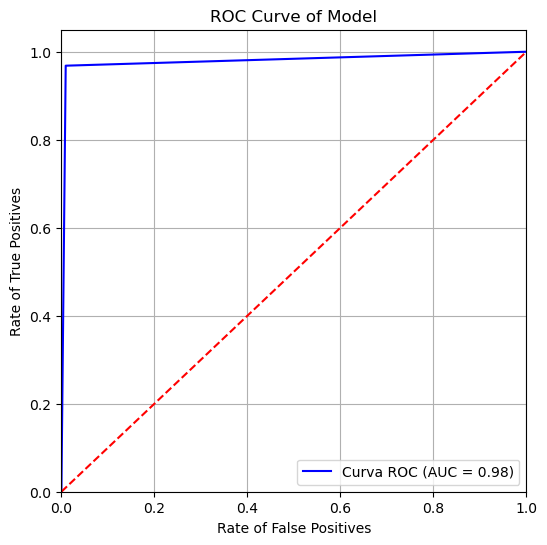

       Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0  Ligth GBM  0.982456   0.983871  0.968254     0.976       0.979497


In [48]:
# Evaluate Model
print("Evaluation of Model 8:\n")
accuracy_8, precision_8, recall_8, f1_8 = evaluate_model(y_test, y_pred8)

# Calculate the ROC curve
roc_auc_8 = roc_curve_plot(y_test, y_pred8)

# Results of Model 8
results_8 = pd.DataFrame([["Ligth GBM",accuracy_8,precision_8,recall_8,f1_8, roc_auc_8]],columns=['Model','Accuracy','Precision', 'Recall','F1 score', 'AUC ROC score'])
print(results_8)

# Add results to the table
results = pd.concat([results, results_8], ignore_index=True)

## 3.9 Catboost

Evaluation of Model 9:

Confusion Matrix:
[[105   3]
 [  3  60]]
True negative:  105
False positive:  3
False negative:  3
True positive:  60
Balanced Accuracy: 0.96230159
Accuracy: 0.96491228
Precision: 0.95238095
Recall: 0.95238095
F1 Score: 0.95238095


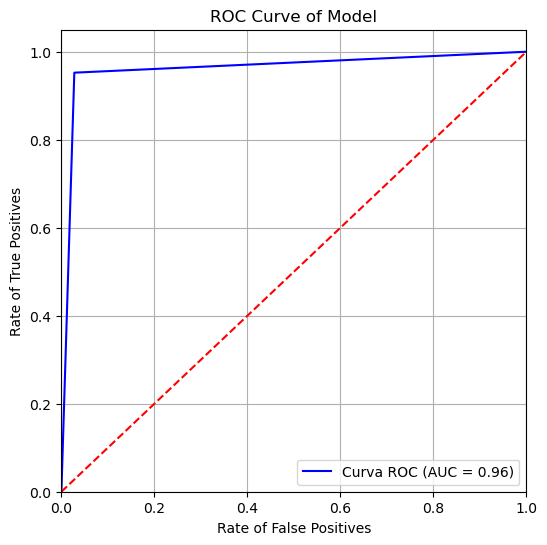

      Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0  Catboost  0.964912   0.952381  0.952381  0.952381       0.962302


In [49]:
# Import libraries
!pip install catboost
from catboost import CatBoostClassifier

# Initialize 
model9 = CatBoostClassifier(verbose=0, random_state=0)

# Fit the model on the training data
model9.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred9 = model9.predict(X_test_scaled)

# Evaluate Model
print("Evaluation of Model 9:\n")
accuracy_9, precision_9, recall_9, f1_9 = evaluate_model(y_test, y_pred9)

# Calculate the ROC curve
roc_auc_9 = roc_curve_plot(y_test, y_pred9)

# Results of Model 9
results_9 = pd.DataFrame([["Catboost",accuracy_9,precision_9,recall_9,f1_9, roc_auc_9]],columns=['Model','Accuracy','Precision', 'Recall','F1 score', 'AUC ROC score'])
print(results_9)

# Add results to the table
results = pd.concat([results, results_9], ignore_index=True)

# 4. Comparing the results

In [50]:
# The table of results
results

Model  Accuracy  Precision    Recall  F1 score  AUC ROC score
0  Logistic Regression  0.976608   0.983607  0.952381  0.967742       0.971561
1        Decision tree  0.912281   0.842857  0.936508  0.887218       0.917328
2        Random Forest  0.959064   0.937500  0.952381  0.944882       0.957672
3                  SVM  0.959064   0.924242  0.968254  0.945736       0.960979
4              XGBoost  0.976608   0.968254  0.968254  0.968254       0.974868
5          Naive-Bayes  0.912281   0.863636  0.904762  0.883721       0.910714
6                  KNN  0.935673   0.948276  0.873016  0.909091       0.922619
7            Ligth GBM  0.982456   0.983871  0.968254  0.976000       0.979497
8             Catboost  0.964912   0.952381  0.952381  0.952381       0.962302

We see that LIgthGBM (Model 8) performed best with respect to all the metrics consideres (accuracy, precision, recall, F1 score and AUC ROC score).

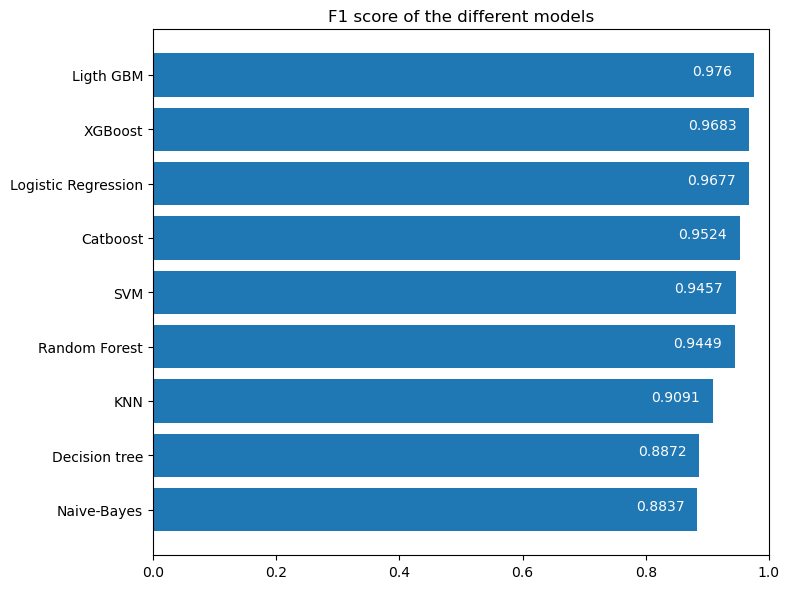

In [51]:
# Plot the results of F1 score
# To save the whole image
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Create a dictionary
dic_f1 = {results["Model"][i]:results["F1 score"][i] for i in range(0, len(results))}
# Reorder 
dic_f1_reorder = sorted(dic_f1.items(), key=lambda item: item[1])
names_reorder = [dic_f1_reorder[i][0] for i in range(0, len(results))]
results_f1_reorder = [dic_f1_reorder[i][1] for i in range(0, len(results))]

# Plot the RMSE
plt.figure(figsize=(8,6))
plt.barh(names_reorder, results_f1_reorder, height = 0.8)
plt.xlim([0,1])
plt.title("F1 score of the different models")
for i, v in enumerate(results_f1_reorder):
    plt.text(v-0.1, i, str(round(v,4)), color='white')
plt.savefig('img/results_plot.jpg')
plt.show()

# 5. Conclusion

In this project, we constructed several models of Classification that predict whether the nodule is benign or malignant. We constructed models with quite good performance, being LightGBM the model with the best result (F1 score = 0,976)..

This is a small dataset, with o30ly 7 columns 5693479 values, which limits the analysis, but the same analysis can be made for very larger datasets.